## SetUp

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import textwrap

# Load your datasets
complaints_df = pd.read_csv("BIC_Complaints_Inquiries_20250612.csv")
violations_df = pd.read_csv("BIC_Issued_Violations_20250612.csv")

# Optional: Set a consistent style
sns.set(style="whitegrid")

## Introduction - need to fill this out more

## Complaint and Violation Trends Over Time

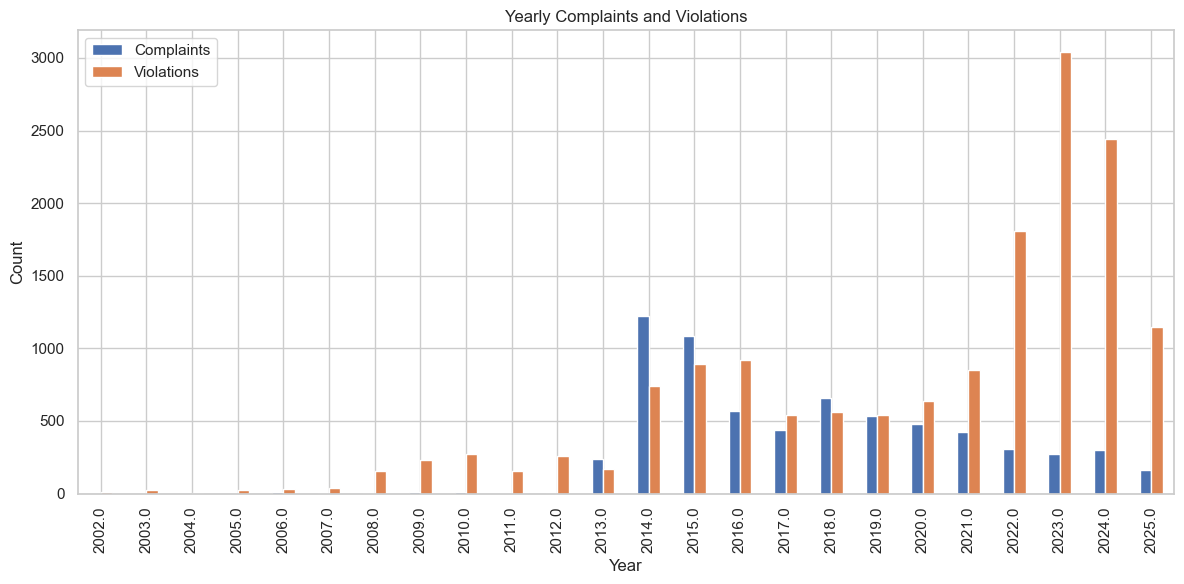

In [3]:
complaints_df['Year'] = pd.to_datetime(complaints_df['DATE COMPLAINT/INQUIRY REPORTED ON'], errors='coerce').dt.year
violations_df['Year'] = pd.to_datetime(violations_df['DATE VIOLATION ISSUED'], errors='coerce').dt.year

# Group by year and count
yearly = pd.DataFrame({
    "Complaints": complaints_df.groupby("Year").size(),
    "Violations": violations_df.groupby("Year").size()
}).fillna(0).astype(int)

# Plot
yearly.plot(kind='bar', figsize=(12, 6), title="Yearly Complaints and Violations")
plt.ylabel("Count")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

In [14]:
complaints_df['DATE COMPLAINT/INQUIRY REPORTED ON'] = pd.to_datetime(
    complaints_df['DATE COMPLAINT/INQUIRY REPORTED ON'], errors='coerce')
violations_df['DATE VIOLATION ISSUED'] = pd.to_datetime(
    violations_df['DATE VIOLATION ISSUED'], errors='coerce')

# Extract Year
complaints_df['Year'] = complaints_df['DATE COMPLAINT/INQUIRY REPORTED ON'].dt.year
violations_df['Year'] = violations_df['DATE VIOLATION ISSUED'].dt.year

# Group counts
yearly_counts = pd.DataFrame({
    'Complaints': complaints_df.groupby('Year').size(),
    'Violations': violations_df.groupby('Year').size()
}).reset_index()

# Filter sensible range
yearly_counts = yearly_counts[(yearly_counts['Year'] >= 2000) & (yearly_counts['Year'] <= 2025)]

fig_trend_overlay = go.Figure()

# Plot
fig_trend_overlay.add_trace(go.Scatter(
    x=yearly_counts['Year'],
    y=yearly_counts['Complaints'],
    mode='lines+markers',
    name='Complaints',
    yaxis='y1'
))

fig_trend_overlay.add_trace(go.Scatter(
    x=yearly_counts['Year'],
    y=yearly_counts['Violations'],
    mode='lines+markers',
    name='Violations',
    yaxis='y2'
))


fig_trend_overlay.update_layout(
    title='Complaints and Violations Over Time',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Complaints', side='left'),
    yaxis2=dict(title='Violations', overlaying='y', side='right'),
    legend=dict(x=0.5, xanchor='center', y=1.1, orientation='h'),
    height=500
)

fig_trend_overlay.show()

# Save chart as high-res PNG
fig_trend_overlay.write_html("trend_overlay.html")

In [4]:
top_violation_years = yearly.sort_values("Violations", ascending=False)

# Step 2: Sort those years by chronological order
top_violation_years_sorted = top_violation_years.sort_index()

# Step 3: Display the result
display(top_violation_years_sorted)


,Complaints,Violations
Year,,
2002.0,0,7
2003.0,0,24
2004.0,0,5
2005.0,0,24
2006.0,8,30
2007.0,1,41
2008.0,5,155
2009.0,10,231
2010.0,7,271


In [5]:
account_summary = pd.DataFrame({
    'Complaints': complaints_df['ACCOUNT NAME'].value_counts(),
    'Violations': violations_df['ACCOUNT NAME'].value_counts()
}).fillna(0)
account_summary['Total'] = account_summary['Complaints'] + account_summary['Violations']
top_accounts = account_summary.sort_values('Total', ascending=False).head(10)
display(top_accounts)


,Complaints,Violations,Total
ACCOUNT NAME,,,
ACTION CARTING ENVIRONMENTAL SERVICES INC.,552.0,254.0,806.0
ROYAL WASTE SERVICES INC.,206.0,301.0,507.0
"WASTE CONNECTIONS OF NEW YORK, INC.",267.0,88.0,355.0
SANITATION SALVAGE CORP.,123.0,154.0,277.0
"LIBERTY ASHES, INC.",179.0,89.0,268.0
CROWN WASTE CORP,201.0,45.0,246.0
"CITY WASTE SERVICES OF NEW YORK, INC.",116.0,105.0,221.0
CENTURY WASTE SERVICES L.L.C.,61.0,147.0,208.0
"METROPOLITAN PAPER RECYCLING, LLC",56.0,117.0,173.0


## Borough Analysis

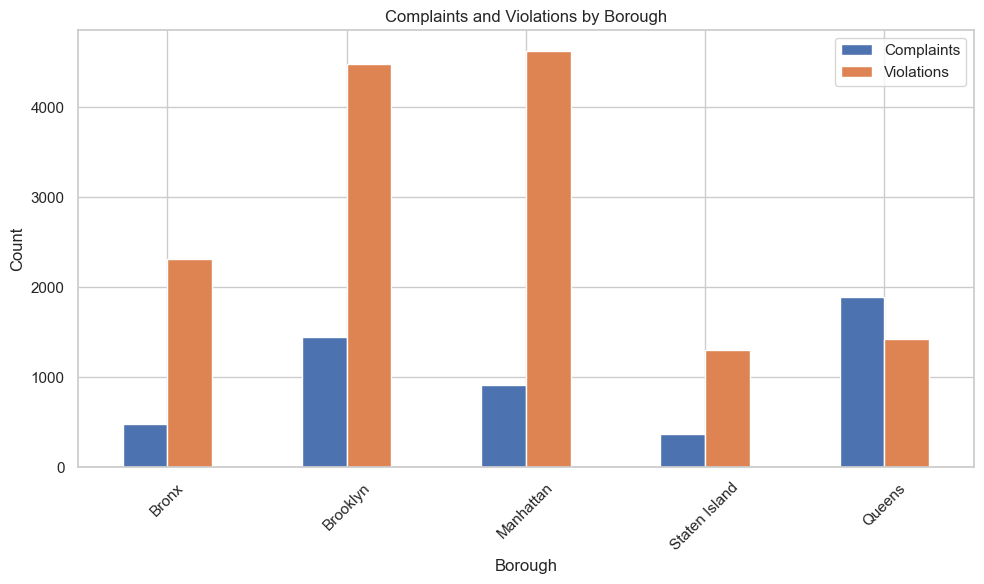

In [6]:
main_boroughs = ['Bronx', 'Brooklyn', 'Manhattan', 'Staten Island', 'Queens']

# Create summary table
borough_summary = (
    pd.DataFrame({
        "Complaints": complaints_df['COMPLAINT/INQUIRY BOROUGH'].value_counts(),
        "Violations": violations_df['BOROUGH OF VIOLATION'].value_counts()
    })
    .fillna(0)
    .astype(int)
    .reset_index()
    .rename(columns={'index': 'Borough'})
)

# Filter to only include the five main boroughs
borough_summary = borough_summary[borough_summary['Borough'].isin(main_boroughs)]

# Sort by borough for consistent order
borough_summary = borough_summary.set_index('Borough').loc[main_boroughs].reset_index()

# Plot side-by-side bars (grouped)
borough_summary.plot(
    x='Borough',
    kind='bar',
    stacked=False,  # Default is False, but explicitly stating for clarity
    figsize=(10, 6),
    title='Complaints and Violations by Borough'
)
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##

## Violation Type Analysis

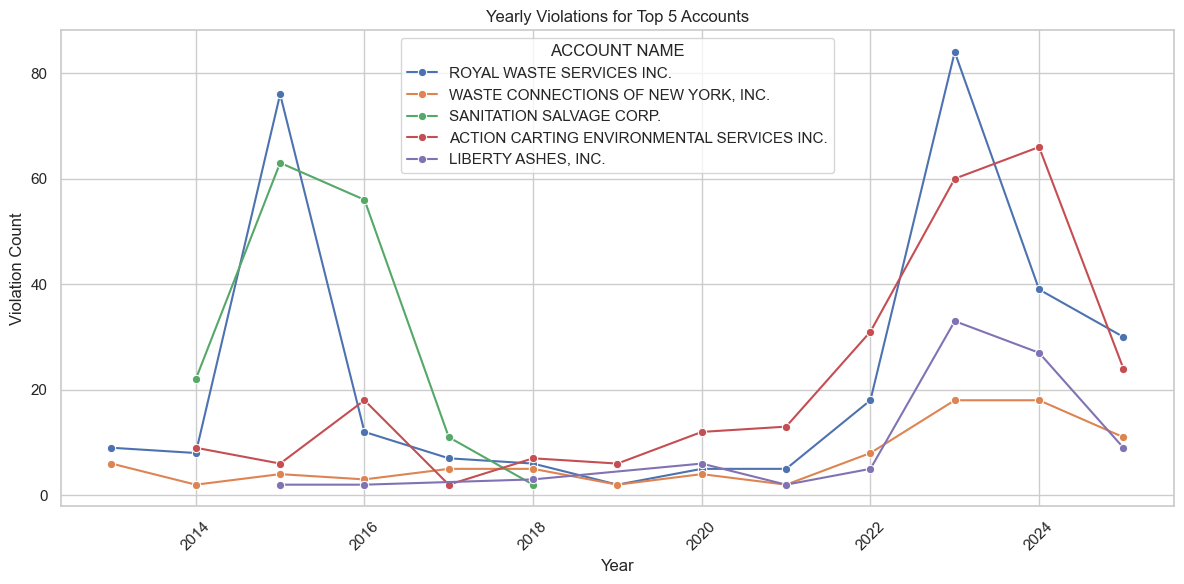

In [7]:
# Ensure datetime format
violations_df['DATE VIOLATION ISSUED'] = pd.to_datetime(violations_df['DATE VIOLATION ISSUED'], errors='coerce')

# Extract year
violations_df['Year'] = violations_df['DATE VIOLATION ISSUED'].dt.year

# Get top 5 accounts (assumes `top_accounts` already exists)
top5_accounts = top_accounts.index[:5]

# Group by account and year
yearly_trend = (
    violations_df[violations_df['ACCOUNT NAME'].isin(top5_accounts)]
    .groupby(['ACCOUNT NAME', 'Year'])
    .size()
    .reset_index(name='Violation Count')
)

# Sort by year to ensure proper plotting order
yearly_trend = yearly_trend.sort_values(by='Year')

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_trend, x='Year', y='Violation Count', hue='ACCOUNT NAME', marker='o')

plt.title("Yearly Violations for Top 5 Accounts")
plt.xlabel("Year")
plt.ylabel("Violation Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

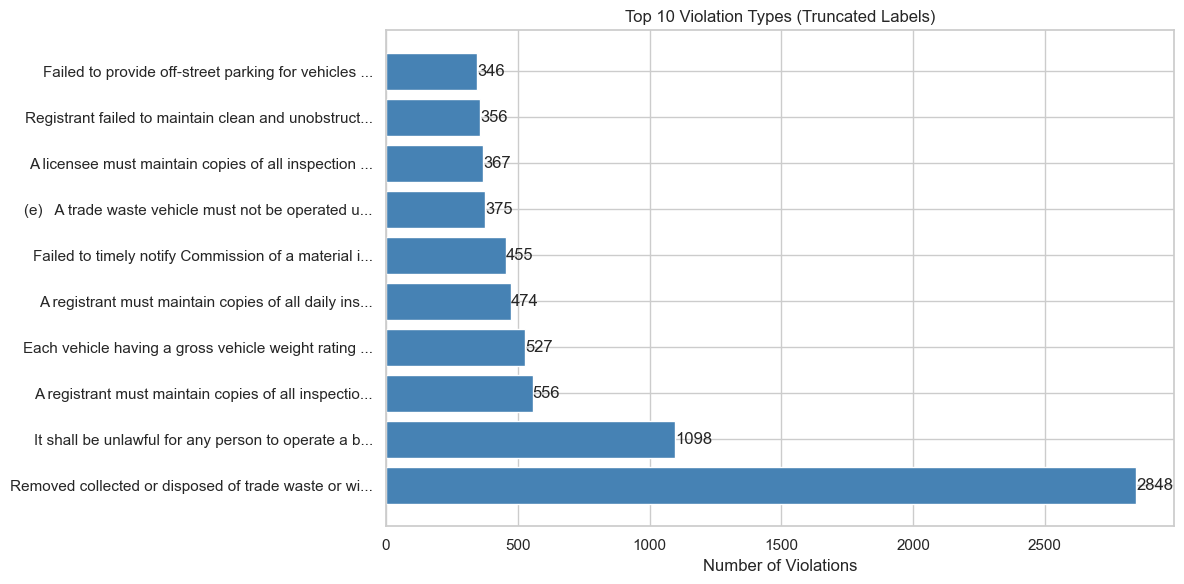

In [8]:
# Get top 10 violation types
top_types = violations_df['DESCRIPTION OF RULE'].value_counts().head(10)

# Truncate long labels for display
truncated_labels = [label[:50] + '...' if len(label) > 50 else label for label in top_types.index]

# Plot
plt.figure(figsize=(12, 6))
bars = plt.barh(truncated_labels, top_types.values, color='steelblue')
plt.xlabel("Number of Violations")
plt.title("Top 10 Violation Types (Truncated Labels)")
plt.tight_layout()

# Optional: Add counts on the bars
for bar, count in zip(bars, top_types.values):
    plt.text(count + 1, bar.get_y() + bar.get_height() / 2, str(count), va='center')

plt.show()


In [9]:
# Get top 10 violation types
top_types = violations_df['DESCRIPTION OF RULE'].value_counts().head(10).reset_index()
top_types.columns = ['Violation Type', 'Count']

# Wrap long text every 60 characters for hover
def wrap_text(text, width=60):
    return '<br>'.join([text[i:i+width] for i in range(0, len(text), width)])

top_types['Wrapped Hover'] = top_types['Violation Type'].apply(wrap_text)
top_types['Short Label'] = top_types['Violation Type'].str.slice(0, 50) + '...'

# Create plot
fig = px.bar(
    top_types,
    x='Count',
    y='Short Label',
    orientation='h',
    hover_name='Short Label',
    hover_data={'Wrapped Hover': True, 'Count': True, 'Violation Type': False, 'Short Label': False},
    title='Top 10 Violation Types with Wrapped Hover Text'
)

fig.update_layout(
    yaxis_title="Violation Type",
    xaxis_title="Number of Violations",
    height=600
)

fig.show()

In [10]:
violations_df['DATE VIOLATION ISSUED'] = pd.to_datetime(violations_df['DATE VIOLATION ISSUED'], errors='coerce')
violations_df['Year'] = violations_df['DATE VIOLATION ISSUED'].dt.year

# --- Step 2: Group and aggregate ---
violation_correlation_df = (
    violations_df.dropna(subset=['DESCRIPTION OF RULE', 'FINE AMOUNT', 'Year'])
    .groupby(['DESCRIPTION OF RULE', 'Year'])
    .agg(
        TotalFines=('FINE AMOUNT', 'sum'),
        ViolationCount=('FINE AMOUNT', 'count'),
        AvgFine=('FINE AMOUNT', 'mean')
    )
    .reset_index()
)

# --- Step 3: Filter to violation types with >= 5 years of data ---
valid_rule_counts = violation_correlation_df.groupby('DESCRIPTION OF RULE')['Year'].nunique()
valid_rules = valid_rule_counts[valid_rule_counts >= 5].index
filtered_df = violation_correlation_df[violation_correlation_df['DESCRIPTION OF RULE'].isin(valid_rules)]

# --- Step 4: Calculate correlation ---
filtered_corr = (
    filtered_df
    .groupby('DESCRIPTION OF RULE')[['AvgFine', 'ViolationCount']]
    .corr()
    .iloc[0::2, -1]  # correlation between AvgFine and ViolationCount
    .reset_index()
    .rename(columns={'DESCRIPTION OF RULE': 'Violation Type', 'ViolationCount': 'Correlation'})
    .drop(columns=['level_1'])
)

# --- Step 5: Wrap long text for hover display ---
def wrap_text(text, width=40):
    return '<br>'.join(textwrap.wrap(text, width=width))

filtered_corr['Violation Type Wrapped'] = filtered_corr['Violation Type'].apply(lambda x: wrap_text(x, width=40))
filtered_corr['Violation Type Short'] = filtered_corr['Violation Type'].str.slice(0, 50) + '...'

# --- Step 6: Get top 10 with strongest negative correlation ---
top_negative_corr = filtered_corr.sort_values(by='Correlation').head(10)

# --- Step 7: Plot interactive bar chart ---
fig = px.bar(
    top_negative_corr,
    x='Correlation',
    y='Violation Type Short',
    orientation='h',
    color='Correlation',
    color_continuous_scale='RdBu',
    title="Top 10 Violation Types: Correlation Between Avg Fine and Violation Count",
    hover_data={'Violation Type Wrapped': True, 'Correlation': ':.2f'}
)

# Use custom hovertemplate to wrap violation type
fig.update_traces(
    hovertemplate='<b>Violation Type</b>: %{customdata[0]}<br>Correlation: %{x:.2f}<extra></extra>',
    customdata=top_negative_corr[['Violation Type Wrapped']].to_numpy()
)

fig.update_layout(
    xaxis_title="Correlation (Avg Fine vs Violation Count)",
    yaxis_title="Violation Type",
    height=600
)

fig.show()

In [11]:
# Get top 10 most common violation types
top_violation_types = violations_df['DESCRIPTION OF RULE'].value_counts().head(10).index

# Compute average fines
avg_fine_by_type = (
    violations_df[violations_df['DESCRIPTION OF RULE'].isin(top_violation_types)]
    .groupby('DESCRIPTION OF RULE')
    .agg(
        AverageFine=('FINE AMOUNT', 'mean'),
        Count=('FINE AMOUNT', 'size')
    )
    .reset_index()
)

# Shorten and wrap for axis labels
def wrap_label(text, word_limit=6, wrap_width=25):
    short = ' '.join(text.split()[:word_limit])
    return '<br>'.join(textwrap.wrap(short, wrap_width))

# Wrap full description for hover
def wrap_hover(text, wrap_width=60):  # Increase from 40 to 60
    return '<br>'.join(textwrap.wrap(text, wrap_width))

avg_fine_by_type['Label'] = avg_fine_by_type['DESCRIPTION OF RULE'].apply(wrap_label)
avg_fine_by_type['HoverText'] = avg_fine_by_type['DESCRIPTION OF RULE'].apply(wrap_hover)

# Sort
avg_fine_by_type = avg_fine_by_type.sort_values(by='AverageFine', ascending=False)

# Plot
fig = px.bar(
    avg_fine_by_type,
    x='AverageFine',
    y='Label',
    orientation='h',
    hover_name='HoverText',
    hover_data={
        'AverageFine': ':.2f',
        'Count': True,
        'Label': False
    },
    labels={'AverageFine': 'Average Fine ($)', 'Label': 'Violation Type'},
    title='Average Fine Amount for Top 10 Violation Types'
)

fig.update_layout(
    xaxis_title='Average Fine ($)',
    yaxis_title='Violation Type',
    height=600,
    margin=dict(l=180, r=40, t=50, b=50),
    hoverlabel=dict(
        font_size=12,
        align='left',
        namelength=-1  # Ensures full hover text is shown
    )
)

fig.show()

## Top Offending Accounts

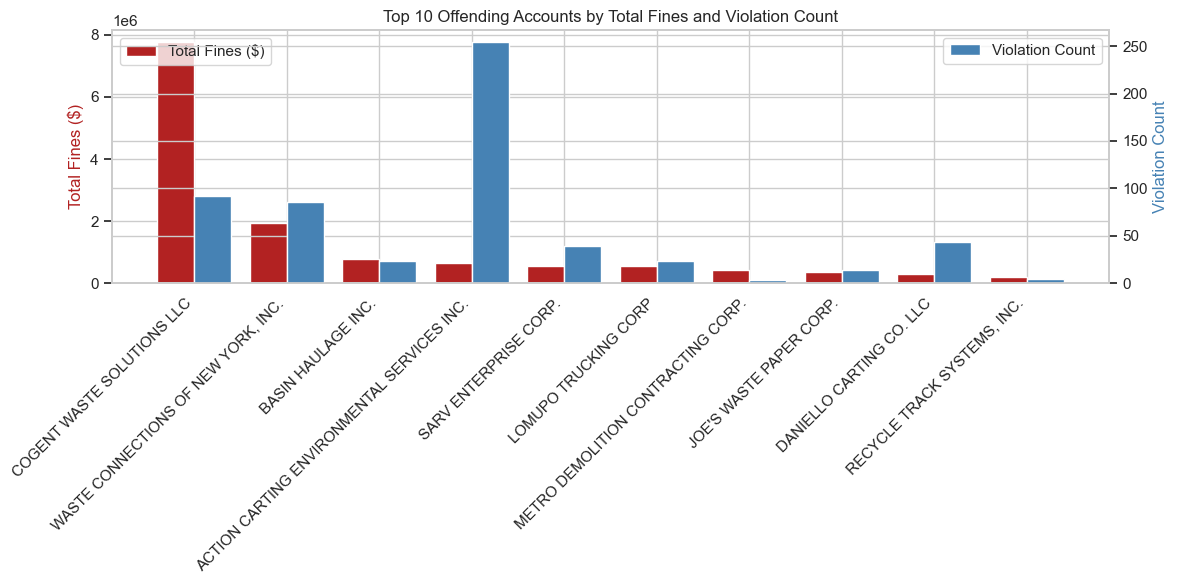

In [12]:
# Make sure 'DATE VIOLATION ISSUED' is datetime and drop nulls
violations_df['DATE VIOLATION ISSUED'] = pd.to_datetime(violations_df['DATE VIOLATION ISSUED'], errors='coerce')
violations_df = violations_df.dropna(subset=['ACCOUNT NAME', 'FINE AMOUNT'])

# Group by ACCOUNT NAME
account_summary = (
    violations_df
    .groupby('ACCOUNT NAME')
    .agg(
        TotalFines=('FINE AMOUNT', 'sum'),
        ViolationCount=('FINE AMOUNT', 'count')
    )
    .sort_values(by='TotalFines', ascending=False)
    .reset_index()
)

# Take top 10 accounts by total fines
top_accounts = account_summary.head(10)

# Plot using dual bar chart (side-by-side)
fig, ax1 = plt.subplots(figsize=(12, 6))

bar_width = 0.4
positions = range(len(top_accounts))

ax1.bar(
    [p - bar_width/2 for p in positions],
    top_accounts['TotalFines'],
    width=bar_width,
    label='Total Fines ($)',
    color='firebrick'
)

ax2 = ax1.twinx()
ax2.bar(
    [p + bar_width/2 for p in positions],
    top_accounts['ViolationCount'],
    width=bar_width,
    label='Violation Count',
    color='steelblue'
)

# Axis and formatting
ax1.set_ylabel('Total Fines ($)', color='firebrick')
ax2.set_ylabel('Violation Count', color='steelblue')
ax1.set_xticks(positions)
ax1.set_xticklabels(top_accounts['ACCOUNT NAME'], rotation=45, ha='right')
plt.title('Top 10 Offending Accounts by Total Fines and Violation Count')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()